# Customer Segmentation Using 'RFM' Approach :

    E-commerce stores which became success stories were successful in targeting the desired customers. One of the techniques by which they were able to achieve this was customer segmentation i.e. by segmenting the existing customers based on frequency of purchases, monetary value etc. E-commerce stores who designed market strategies based on mass marketing soon realized the need of customer segmentation as an alternative to save cost and efforts in the digital sphere. In a real-world segmentation scenario, there might be hundreds of variables which can be used but broadly they segment the customers by the characteristics like State, Country, City, Geography, Age, Personality Trait, Income, Lifestyle etc. 

# Problem Statement :

    Build a model to perform customer segmentation on the basis of data collected from an online retail store using RFM approach to enable the company to analyze their customer and to optimize their retention and acquisition strategies.

# Import Basic Libraries :

In [1]:
import os,sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\BIDISHA\\OneDrive\\Desktop\\Python\\PROJECT SESSION'

# Import Dataset :

In [3]:
path = r'D:\Learn_Bay_Project_Session\E-Commerse\E-com_Data.csv'

dataset = pd.read_csv(path)
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


# Exploratory Data Analysis :

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


## Observation :
- There are both numerical and categorical variables in the dataset.
- Most of the values in 'Cancelled_status', 'Reason of return' and 'Sold as set' columns are missing values.

# Checking For missing Values :

In [5]:
dataset.isnull().sum()/len(dataset)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

## Observation :
- 98%, 99% and 100% values in 'Cancelled_status', 'Reason of return' and 'Sold as set' columns respectively are missing values.

In [6]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

# Dropping of Insignificant Columns :

- 'Cancelled_status', 'Reason of return' and 'Sold as set' columns have a lot of missing values.So we will drop these columns.
- 'Item Code', 'Quantity', 'Time', 'price per unit','Shipping Location' are not important for this project.So we will drop these columns.

In [10]:
dataset = dataset.drop(['Item Code','Quantity',
                       'Time','price per Unit',
                       'Shipping Location','Cancelled_status',
                       'Reason of return','Sold as set'], axis=1)
dataset.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


# Checking for duplicate entries :

In [11]:
dataset.duplicated().sum()

6008

- we will drop the duplicate entries.

In [12]:
dataset = dataset.drop_duplicates(ignore_index=True)

In [13]:
dataset.duplicated().sum()

0

# Renaming of Columns :

In [14]:
dataset = dataset.rename(columns={'InvoieNo':'InvoiceNo',
                                  'Date of purchase':'Date'})
dataset.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [15]:
dataset.isnull().sum()

CustomerID    132249
InvoiceNo          1
Date               1
Price              1
dtype: int64

- Still there are some missing values in 'Customer ID' Column.
- For this project customer id is the most important feature to identify the customer and target them. So if the value of 'Customer ID' is missing that perticular entry will be of no use.
- We will drop all the entries where 'Customer ID' value is missing.

In [16]:
dataset = dataset.dropna(subset=['CustomerID'])
dataset.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

# Analyse Date Part

In [17]:
import datetime as dt

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   InvoiceNo   402859 non-null  float64
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


- The 'Date' column is given as 'object' type.
- We will convertit to 'datetime' data type.

In [19]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   InvoiceNo   402859 non-null  float64       
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [21]:
dataset['Date'].describe()

count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [22]:
latest_date = dt.datetime(2017,12,20)
print(latest_date)

2017-12-20 00:00:00


# Calculate 'Recency', 'Frequency' and 'Monetary' for each Customer :

In [23]:
RFMScore = dataset.groupby('CustomerID').agg({'Date': lambda x:(latest_date - x.max()).days,
                                              'InvoiceNo' : lambda x:x.count(),
                                              'Price' : lambda x:x.sum()})

RFMScore.rename(columns = {'Date':'Recency', 'InvoiceNo':'Frequency','Price':'Monetory'},inplace=True)
RFMScore.head()

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0


In [24]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,751,279720.0


In [25]:
for i in RFMScore.columns:
    print('*'*50,i,'*'*50)
    print()
    print(set(RFMScore[i].tolist()))
    print()

************************************************** Recency **************************************************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 587, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 526, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 617, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 106, 119, 120, 121, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 155, 157, 161, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 185, 188, 190, 191, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 216, 220, 226, 228, 230, 231, 232, 234, 235, 236, 237, 239, 240, 2

# Segmentation Concept :

In [26]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [27]:
RFMScore['Recency'].describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [28]:
RFMScore['Frequency'].describe()

count    4349.000000
mean       92.632559
std       230.742279
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7919.000000
Name: Frequency, dtype: float64

In [29]:
RFMScore['Monetory'].describe()

count    4.349000e+03
mean     2.294939e+05
std      8.556685e+05
min     -5.037200e+04
25%      3.814000e+04
50%      8.363500e+04
75%      2.054440e+05
max      3.547209e+07
Name: Monetory, dtype: float64

# Calculate Quartile value for 'Recency', 'Frequency' and 'Monetary':

In [30]:
quantile = RFMScore.quantile(q=[0.25,0.50,0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

# Provide Rank to the customers basis on RFM Score:

In [31]:
def recency_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [32]:
RFMScore['R'] = RFMScore['Recency'].apply(recency_score, args=('Recency', quantile))
RFMScore.head()

,Recency,Frequency,Monetory,R
CustomerID,,,,
2.0,4,181,550416.0,1
3.0,77,27,257404.0,4
4.0,20,72,176613.0,3
5.0,18,16,41976.0,2
6.0,9,84,151822.0,1


In [33]:
def FnM_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [34]:
RFMScore['F'] = RFMScore['Frequency'].apply(FnM_score, args=('Frequency', quantile))
RFMScore['M'] = RFMScore['Monetory'].apply(FnM_score, args=('Monetory', quantile))
RFMScore.head()

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,181,550416.0,1,1,1
3.0,77,27,257404.0,4,3,1
4.0,20,72,176613.0,3,2,2
5.0,18,16,41976.0,2,4,3
6.0,9,84,151822.0,1,2,2


In [35]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [36]:
RFMScore['RFM'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)
RFMScore.head()

,Recency,Frequency,Monetory,R,F,M,RFM
CustomerID,,,,,,,
2.0,4,181,550416.0,1,1,1,111
3.0,77,27,257404.0,4,3,1,431
4.0,20,72,176613.0,3,2,2,322
5.0,18,16,41976.0,2,4,3,243
6.0,9,84,151822.0,1,2,2,122


In [37]:
RFMScore['RFM_Score'] = RFMScore[['R','F','M']].sum(axis=1)
RFMScore.reset_index().head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score
0,2.0,4,181,550416.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5


In [38]:
RFMScore['RFM_Score'].value_counts()

3     509
10    480
9     460
8     451
7     439
12    408
11    404
5     402
6     399
4     397
Name: RFM_Score, dtype: int64

# Segment Customers on the basis of 'RFM' Score :

In [39]:
Loyal_Customer = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cut_off = pd.qcut(RFMScore['RFM_Score'], q=4, labels=Loyal_Customer)
RFMScore['Loyal_Customer'] = score_cut_off.values
RFMScore = RFMScore.reset_index()

In [40]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyal_Customer
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum


In [41]:
RFMScore['Loyal_Customer'].value_counts()

Platinum    1308
Gold        1289
Silver       940
Bronze       812
Name: Loyal_Customer, dtype: int64

# Visualization :

In [42]:
new_datapoint = RFMScore.groupby(['Loyal_Customer'])[['Recency','Frequency','Monetory','CustomerID']].agg({
    'Recency':'sum','Frequency':'sum', 'Monetory':'sum','CustomerID':'nunique'
}).reset_index()

In [43]:
new_datapoint = new_datapoint.rename(columns = {'CustomerID':'No_Of_Customers'})
new_datapoint

,Loyal_Customer,Recency,Frequency,Monetory,No_Of_Customers
0,Platinum,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,Silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


In [44]:
new_datapoint['Percentage'] = round(new_datapoint['No_Of_Customers']/new_datapoint['No_Of_Customers'].sum()*100,2)

In [45]:
new_datapoint

,Loyal_Customer,Recency,Frequency,Monetory,No_Of_Customers,Percentage
0,Platinum,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,Silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [46]:
new_datapoint = new_datapoint.drop(['Recency','Frequency','Monetory'], axis=1)
new_datapoint

,Loyal_Customer,No_Of_Customers,Percentage
0,Platinum,1308,30.08
1,Gold,1289,29.64
2,Silver,940,21.61
3,Bronze,812,18.67


In [47]:
import squarify

<AxesSubplot:>

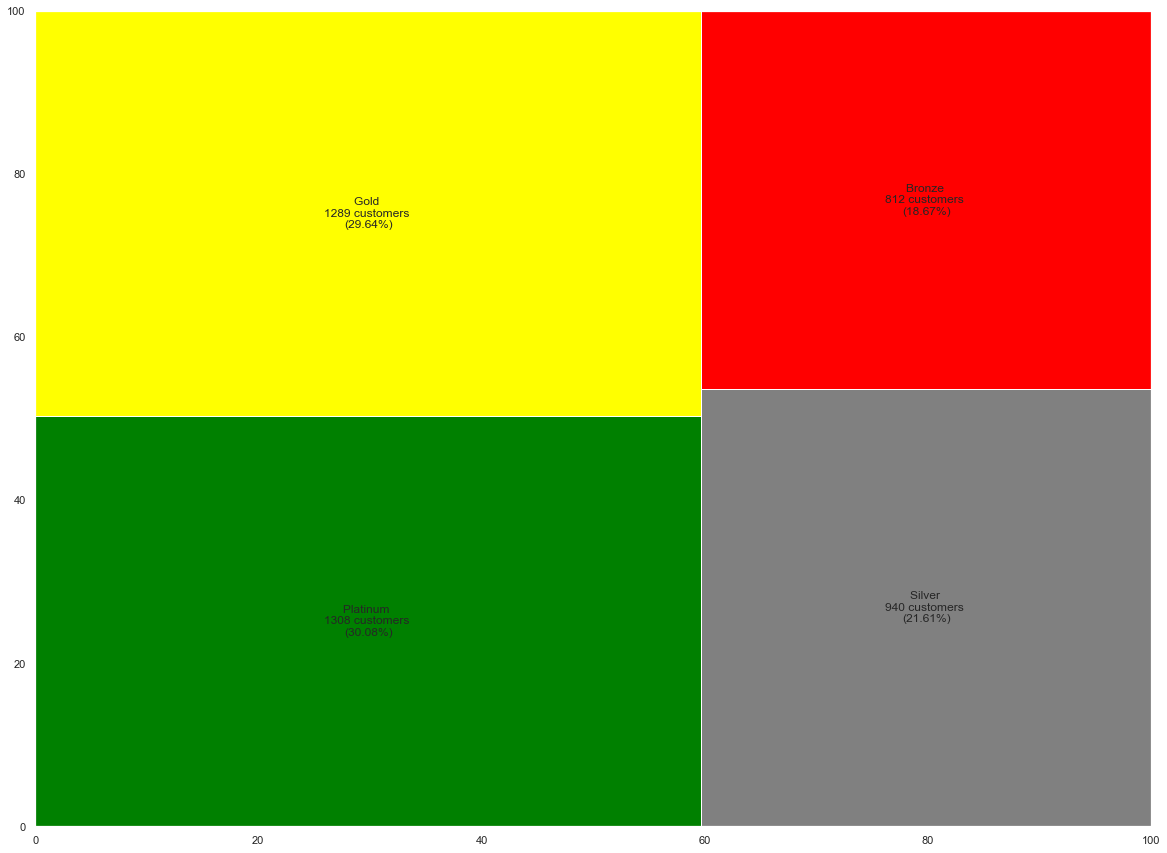

In [48]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dics = {'Platinum':'green', 'Gold':'yellow', 'Silver':'gray', 'Bronze':'red'}

squarify.plot(sizes=new_datapoint['No_Of_Customers'],
             color = colors_dics.values(),
             label = ['{} \n{:.0f} customers \n({}%)'.format(*new_datapoint.iloc[i]) for i in range(0, len(new_datapoint))],)
                    

- From this visual representation we can observe 30% customers belongs to **'Platinum'** category, 29% customers belongs to **'Gold'** category, 21% customers belongs to **'Silver'** category and 19% customers belongs to **'Bronze'** category  

# Building Unsupervised Machine Learning Clustering Algorithms :

## K-Means Clustering :

In [50]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyal_Customer
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum


In [51]:
RFMScore1 = RFMScore.iloc[:,1:4]
RFMScore1.head()

,Recency,Frequency,Monetory
0,4,181,550416.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0


In [52]:
# Mandetory Preprocessing - Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
RFMScore1_sc = sc.fit_transform(RFMScore1)

Scaled_data = pd.DataFrame(RFMScore1_sc, columns=RFMScore1.columns, index = RFMScore1.index)
Scaled_data.head()

,Recency,Frequency,Monetory
0,-0.640796,0.383014,0.375097
1,0.173513,-0.284474,0.032622
2,-0.462317,-0.089428,-0.061808
3,-0.484627,-0.332151,-0.219173
4,-0.585021,-0.037416,-0.090784


In [53]:
# Building KMeans Cluster

from sklearn.cluster import KMeans

In [54]:
wcss = []

for i in range(2,15):
    KM = KMeans(n_clusters=i, init='k-means++', max_iter=1000, random_state=1)
    KM.fit(Scaled_data)
    wcss.append(KM.inertia_)

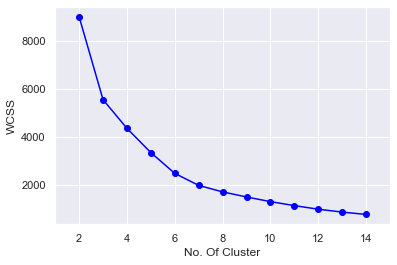

In [58]:
k=range(2,15)
plt.plot(k,wcss,color='blue',marker='o')
plt.xlabel('No. Of Cluster')
plt.ylabel('WCSS')
plt.xlim((1,15))
plt.show()

In [81]:
KM = KMeans(n_clusters=8, init='k-means++', max_iter=1000, random_state=1)
KM.fit(Scaled_data)
Y_pred = KM.predict(Scaled_data)

In [82]:
Y_pred

array([0, 4, 4, ..., 4, 6, 4])

In [83]:
combined = pd.concat([RFMScore1, pd.DataFrame(Y_pred)], axis=1)
combined.head(5)

,Recency,Frequency,Monetory,0
0,4,181,550416.0,0
1,77,27,257404.0,4
2,20,72,176613.0,4
3,18,16,41976.0,4
4,9,84,151822.0,4


In [84]:
combined.columns = ['Recency','Frequency','Monetory','Category']

In [85]:
combined.head()

,Recency,Frequency,Monetory,Category
0,4,181,550416.0,0
1,77,27,257404.0,4
2,20,72,176613.0,4
3,18,16,41976.0,4
4,9,84,151822.0,4


In [86]:
combined['Category'].value_counts()

4    2643
0     700
7     500
1     353
6     135
5      13
3       4
2       1
Name: Category, dtype: int64

In [87]:
from sklearn.metrics import silhouette_score

In [102]:
silhouette_score(Scaled_data,Y_pred)

0.4879277467817194

## Hierarchical Clustering :

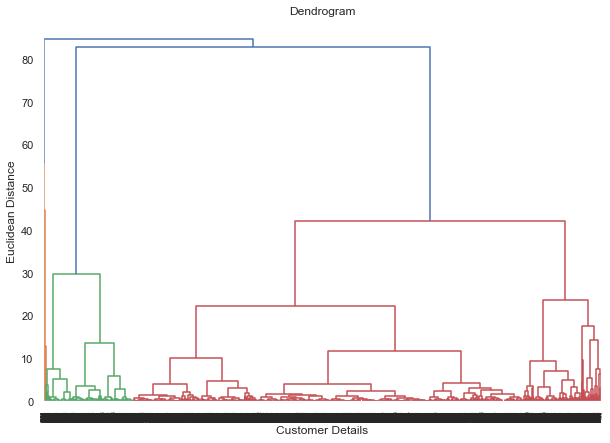

In [89]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(Scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer Details')
plt.ylabel('Euclidean Distance')
plt.show()

In [90]:
from sklearn.cluster import AgglomerativeClustering

In [96]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc

AgglomerativeClustering(n_clusters=4)

In [97]:
y_hc = hc.fit_predict(Scaled_data)
y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [98]:
combined_hc = pd.concat([RFMScore1, pd.DataFrame(y_hc)], axis=1)
combined_hc.columns = ['Recency','Frequency','Monetory','Category']
combined_hc.head(5)

,Recency,Frequency,Monetory,Category
0,4,181,550416.0,1
1,77,27,257404.0,1
2,20,72,176613.0,1
3,18,16,41976.0,1
4,9,84,151822.0,1


In [101]:
silhouette_score(Scaled_data.values,y_hc)

0.6633142044789895

In [100]:
combined_hc['Category'].value_counts()

1    3644
2     683
0      18
3       4
Name: Category, dtype: int64

- In both the clustering method customer segmentation is not balanced. In some of the segment no. of customers is very high ~3000 and in some of the segments no. of customers is very less only 1 or 3.
- So we will select the manual segmentation process as the final model.